# Kümeleme Analizi

* Kümeleme analizi, benzer olan örneklerin bir araya getirilmesi ve farklı olan örneklerin ise ayrıştırılmasıyla, veri setinin kümelere ayrılmasını amaçlayan bir yöntemdir. 
* Bu yöntemde her bir küme kendi içinde homojen durumdayken, kümeler birbirleri arasında heterojen durumdadır. Kümeler içi homojenlik ve kümeler arası heterojenlik ne kadar yüksek düzeyde olursa o kadar tatmin edici bir kümeleme sonucu elde edilmektedir.
* Kümeleme analizinde oluşturulacak kümelerin özelliklerinin belirli olmamasının yanı sıra en uygun küme sayısının da ne olacağı kesin olarak bilinmemektedir.
* Bu analizde bağımlı değişken bulunmaz ve değişkenler gösterdikleri özelliklere göre karşılaştırılır.
* Kümeleme analizinde kullanılan yöntemlerin çoğu gözlem değerleri arasındaki uzaklıkların hesaplanmasına dayanmaktadır. Bu sebeple iki nokta arasındaki uzaklığı hesaplayan bağıntılara ihtiyaç vardır. 

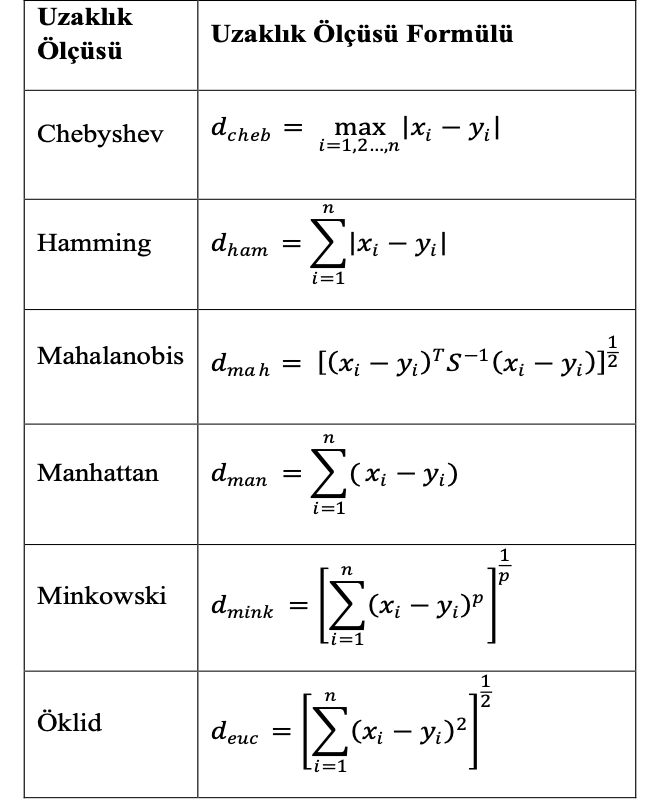

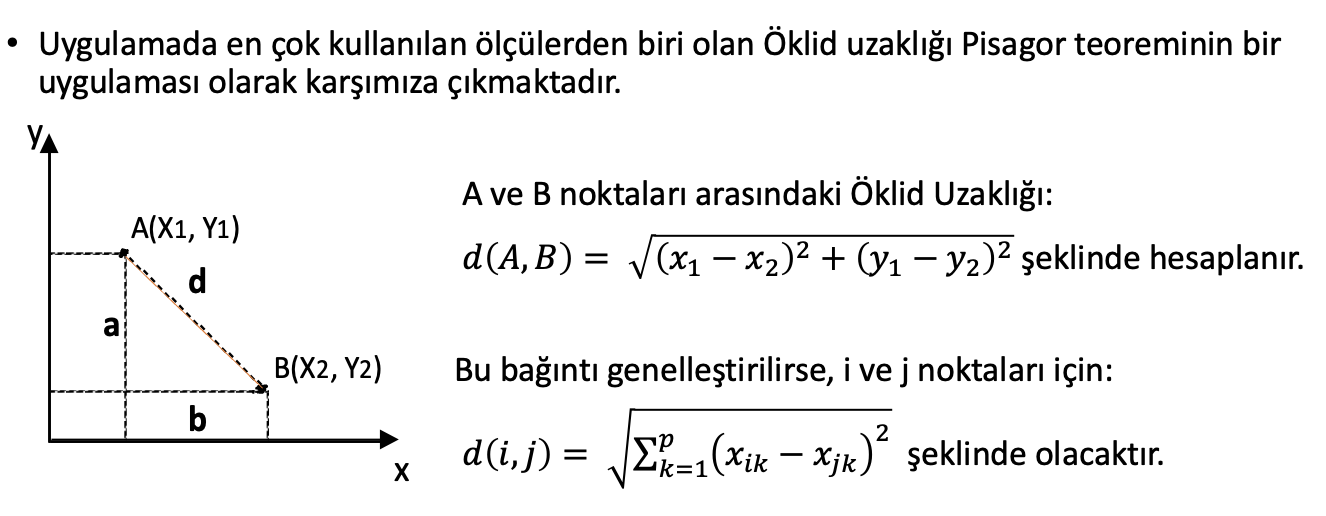

## Hiyerarşik Kümeleme
* Hiyerarşik kümelemenin birleştirici yöntemlerinde, başlangıçta her bir örnek bağımsız bir küme olarak değerlendirilmekte ve bu örnekler çeşitli algoritmalarla birleştirilerek her aşamada bir üst küme oluşturulmaktadır. Ayrıştırıcı yöntemlerde ise tüm örnekler beraberce tek bir küme olarak değerlendirilmekte, daha sonrasında çeşitli ayrıştırma algoritmalarıyla alt kümeler elde edilmektedir.  
* Hiyerarşik kümeleme yaklaşımında ağaç yapısı şeklinde tüm nesnelerin bağıntılarını gösteren dendogram diyagramı oluşturulmaktadır 

### Birleştirici Yöntemler
- Tek Bağlantı Yöntemi
- Tam Bağlantı Yöntemi
- Ortalama Bağlantı Yöntemi
- Ward Bağlantı Yöntemi 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


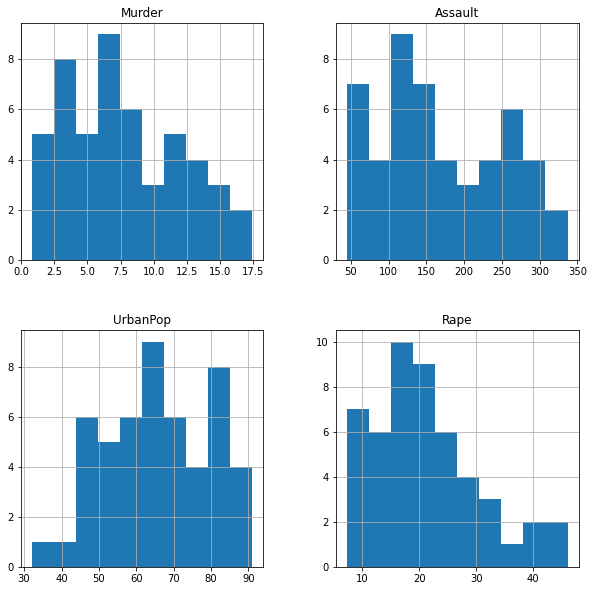

In [5]:
df.hist(figsize = (10,10));

# Optimum Küme Sayısının Belirlenmesi

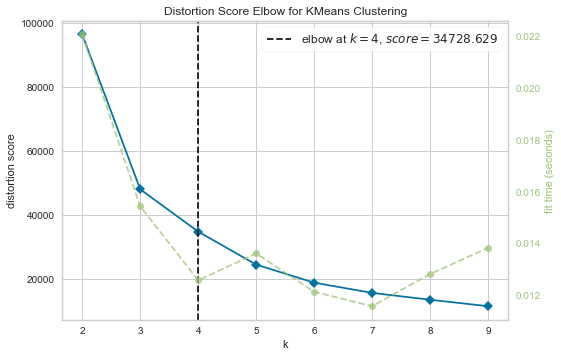

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df) 
visualizer.poof() 

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)

### Küme Sayısı

In [13]:
k_fit.n_clusters

4

### Küme Merkezleri

In [14]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [15]:
k_fit.labels_

array([0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 1, 0,
       2, 0, 1, 3, 3, 0, 2, 1, 0, 0, 0, 2, 3, 1, 1, 3, 1, 0, 2, 1, 1, 3,
       2, 1, 1, 2, 2, 1], dtype=int32)

### Hata Kareler Toplamı

In [17]:
k_fit.inertia_

34728.629357142854

### İterasyon Sayısı

In [18]:
k_fit.n_iter_

6

In [20]:
from mpl_toolkits.mplot3d import Axes3D

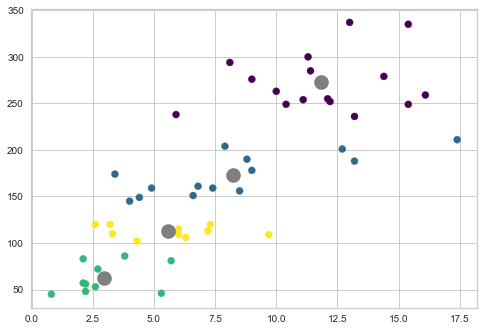

In [21]:
kumeler = k_fit.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

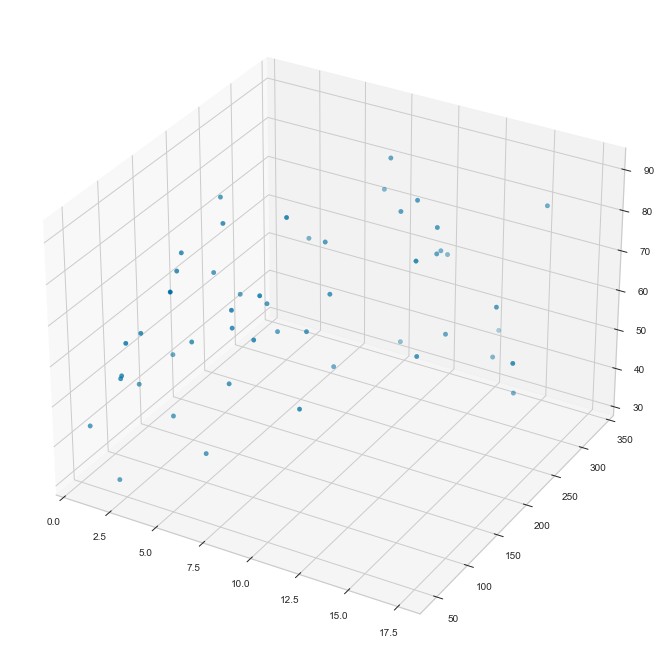

In [22]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

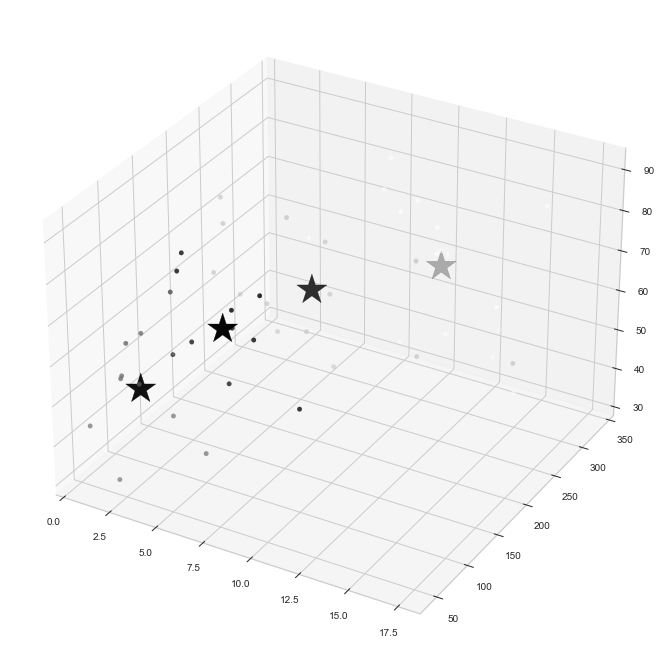

In [23]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [25]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]
df["kume_no"] = kumeler
df["kume_no"] = df["kume_no"] + 1

In [27]:
df["kume_no"].value_counts()

1    16
2    14
4    10
3    10
Name: kume_no, dtype: int64

# Hiyerarşik Kümeleme

In [28]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [29]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

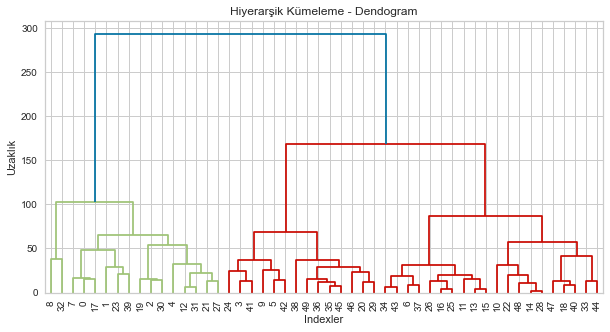

In [34]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 5))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

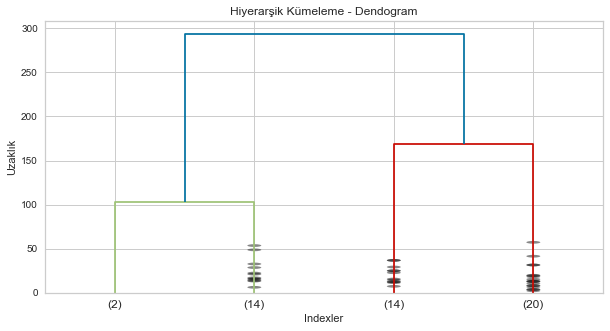

In [33]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 5))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

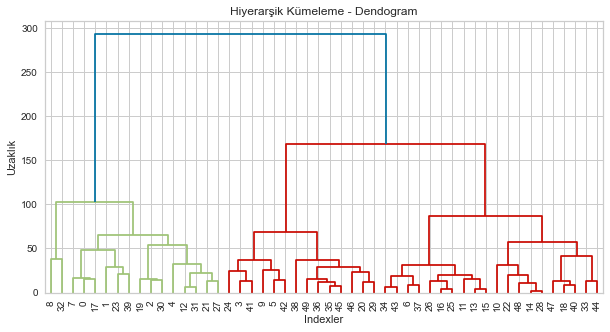

In [36]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 5))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [38]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [43]:
df["kume_no_h"] = cluster.fit_predict(df)

In [44]:
df["kume_no_h"].value_counts()

0    16
2    14
3    10
1    10
Name: kume_no_h, dtype: int64